# The Renin–Angiotensin–Aldosterone System (RAAS)
## RAAS: Function and Biological Purpose
The renin–angiotensin–aldosterone system (RAAS) is a hormonal signaling cascade that regulates blood pressure, fluid volume, and electrolyte balance in the body. It is a key homeostatic mechanism that activates when blood pressure is low to restore it.

### The Classical Model of the RAAS Pathway
![RAAS](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41371-020-00459-3/MediaObjects/41371_2020_459_Fig1_HTML.png?as=webp)
1. **Renin**, an enzyme from the kidney, converts angiotensinogen (from the liver) into **angiotensin I**
2. **Angiotensin-Coverting Enzyme (ACE)** then cleaves angiotensin I into **angiotensin II (Ang II)**
3. **Angiotensin II** is the main effector of the RAAS. This binds to the **angiotensin type 1 receptor** to raise blood pressure by causing the narrowing of blood vessels, stimulating aldosterone release (promoting sodium and water retention), and by activating the sympathetic nervous system.

However, overactivation of the RAAS system could lead to pro-inflammatory and pro-fibrotic (scarring) effects. The excessive activity of Ang II has been implicated in the following:
1. Hypertension
2. Heart Failure
3. Chronic Kidney Disease
4. Cardiovascular remodeling and organ damage

Medications such as ACE inhibitors and ARBs are fundamental for the treatment of these conditions. However, it was also discovered that RAAS isn't a single pathway but a system of "competing" pathways. This was described as a **"pressor" arm** driven by ACE and a **"protective" arm** driven by ACE2.

ACE2 was discovered in 2000 as a homolog of ACE (~60% similarity). The most important reaction catalyzed by ACE2 is the conversion of Ang II into **Ang 1-7**. Ang 1-7 binds to Mas and MrgD receptors, causing vasodilation, smooth muscle relaxation, and lowering pressure in the kidneys.

# ACE2 and COVID-19

In 2003, ACE2 primarily gained more attention beyond its physiology when it was identified as the entry receptor for the SARS coronavirus (SARS-COV). Seventeen years later, a new coronavirus **SARS-COV-2** also uses ACE2 as its gateway into human cells. In fact , the virus has evolved to bind ACE2 with remarkable affinity. This affinity was quantified 10-20 times hgiher than that of the 2003 SARS-CoV spike for ACE2. It should also be noted that the ACE2 receptor is primarily found on the epithelial tissue of the lungs (cite: Human Protein Atlas)

## Mechanism of Viral Entry
Binding is only the first step. The entry of the virus into the host cells also requires the cleavage of the viral Spike protein by host proteases.
1. The viral Spike binds to the ACE2 receptor on the host cell surface.
2. The spike protein is cleaved by the host cell's proteases. The SARS-CoV-2 Spike has a furin cleavage site. This site is cleaved by furin during virus production, which makes the virus more efficient in infecting the host cell.
3. Then after binding to ACE2, the host proteases make a final cut at the S2' site. This activates the Spike's fusion machinery.
4. Finally, the Spike's fusion peptide is unleashed into the host cell membrane, refolding into a more stable state, pulling the viral and cellular membranes together which lets it enter the cytoplasm.

# Working Question
Due to the afforementioned affinity of the SARS-CoV-2 Spike protein for human ACE2, we aim to analyze **which animal species are also suscpetible to infection by SARS-CoV-2.** By analyzing the similarity between the ACE2 orthologs of various vertebrates and the human ACE2 protein, we can infer their potential as hosts for the virus. This python notebook aims to replicate the study made by Liu et. al wherein they tested 48 different ACE2 orthologs and found that 44 of them could succesfully bind the SARS-CoV-2 Spike protein and support viral entry into cells. Furthermore, another study by the same authors also studied the host range for SARS-CoV, a bat CoV and pangolin CoV in the hopes of developing a potential treatment for these viruses.

[1] Fountain JH, Kaur J, Lappin SL. Physiology, Renin Angiotensin System. [Updated 2023 Mar 12]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK470410/

[2] Bhalla, V., Blish, C.A. & South, A.M. A historical perspective on ACE2 in the COVID-19 era. J Hum Hypertens 35, 935–939 (2021). https://doi.org/10.1038/s41371-020-00459-3

[3] Lan, J., Ge, J., Yu, J. et al. Structure of the SARS-CoV-2 spike receptor-binding domain bound to the ACE2 receptor. Nature 581, 215–220 (2020). https://doi.org/10.1038/s41586-020-2180-5

[4] Li Y, Wang H, Tang X, Fang S, Ma D, Du CWang Y, Pan HYao WZhang R, Zou X, Zheng J, Xu L, Farzan M, Zhong G 2020. SARS-CoV-2 and Three Related Coronaviruses Utilize Multiple ACE2 Orthologs and Are Potently Blocked by an Improved ACE2-Ig. J Virol 94:10.1128/jvi.01283-20.
https://doi.org/10.1128/jvi.01283-20

In [2]:
import os
import math
import numpy as np
import pathlib

from Bio import Entrez
from Bio import SeqIO
from Bio.Align import PairwiseAligner, substitution_matrices
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


Organisms are retrieved from Functional and genetic analysis of viral receptor ACE2 orthologs reveals a broad potential host range
of SARS-CoV-2 paper. List of accession numbers are shown as follows. Only 11 will be retrieved inclusive of Human ortholog.

| ID | Species | Common Name | NCBI Accession |
|:---|:---|:---|:---|
| #1 | Homo sapiens | Human | NP_001358344.1 |
| #2 | Pan troglodytes | Chimpanzee | XP_016798468.1 |
| | Pan paniscus | Pygmy chimpanzee | XP_008972428.1 |
| #3 | Gorilla gorilla gorilla | Western lowland gorilla | NP_018874749.1 |
| #4 | Nomascus leucogenys | Northern white-cheeked gibbon | XP_003261132.2 |
| #5 | Pongo abelii | Sumatran orangutan | NP_001124604.1 |
| #6 | Macaca mulatta | Rhesus monkey | NP_001129168.1 |
| | Macaca fascicularis | Crab-eating macaque | XP_005593094.1 |
| | Macaca nemestrina | Pig-tailed macaque | XP_011733505.1 |
| | Cercocebus atys | Sooty mangabey | XP_011891198.1 |
| | Mandrillus leucophaeus | Drill | XP_011850923.1 |
| #7 | Papio anubis | Olive baboon | XP_021788732.1 |
| #8 | Theropithecus gelada | Gelada | XP_025227847.1 |
| | Chlorocebus sabaeus | Green monkey | XP_007989304.1 |
| #9 | Rhinopithecus roxellana | Golden snub-nosed monkey | XP_010364367.2 |
| #10 | Piliocolobus tephrosceles | Ugandan red Colobus | XP_023054821.1 |
| #11 | Callithrix jacchus | white-tufted-ear marmoset | XP_008987241.1 |
| #12 | Sapajus apella | Tufted capuchin | XP_032141854.1 |
| | Cebus capucinus imitator | White-headed Capuchin | XP_017367865.1 |
| | Aotus nancymaae | Nancy Ma's Night Monkey | XP_012290105.1 |
| #13 | Saimiri boliviensis boliviensis | Bolivian squirrel monkey | XP_010334925.1 |
| | Propithecus coquereli | (Coquerel's sifaka)monkey | XP_012494185.1 |
| #14 | Oryctolagus cuniculus | Rabbit | XP_002719891.1 |
| | Ochotona princeps | American pika | XP_004597549.2 |
| | Mesocricetus auratus | Golden hamster | XP_005074266.1 |
| #15 | Cricetulus griseus | Chinese hamster | XP_003503283.1 |
| #16 | Peromyscus leucopus | White-footed mouse | XP_028743609.1 |
| | Peromyscus maniculatus bairdii | Prairie Deer Mouse | XP_006973269.1 |
| #18 | Jaculus jaculus | Lesser Egyptian jerboa | XP_004671523.1 |
| #19 | Ictidomys tridecemlineatus | Thirteen-lined ground squirrel | XP_005316051.3 |
| #20 | Sus scrofa | Pig | NP_001116542.1 |
| #21 | Globicephala melas | Long-finned pilot whale | XP_030703991.1 |
| | Lagenorhynchus obliquidens | Pacific white-sided dolphin | XP_026951598.1 |
| #22 | Orcinus orca | Killer whale | XP_004269705.1 |
| #23 | Tursiops truncatus | Common bottlenose dolphin | XP_019781177.1 |
| #24 | Delphinapterus leucas | Beluga whale | XP_022418360.1 |
| | Monodon monoceros | Narwhal | XP_029095804.1 |
| #25 | Neophocaena asiaeorientalis asiaeorientalis | Finless Porpoise | XP_024599894.1 |
| #26 | Lipotes vexillifer | Yangtze River dolphin | XP_007466389.1 |
| #27 | Physeter catodon | Sperm whale | XP_023971279.1 |
| | Balaenoptera acutorostrata scammoni | Minke Whale | XP_028020351.1 |
| #28 | Bos taurus | Cattle | XP_005228485.1 |
| | Bos indicus | Bos taurus indicus | XP_019811719.1 |
| | Bos indicus x Bos taurus | Hybrid cattle | XP_027389727.1 |
| | Bison bison bison | American plain bison | XP_010833001.1 |
| | Odocoileus virginianus texanus | White-tailed fawns | XP_020768965.1 |
| #29 | Bos mutus | Wild yak | XP_005903173.1 |
| #30 | Bubalus bubalis | Water buffalo | XP_006041602.1 |
| #31 | Ovis aries | Sheep | XP_011961657.1 |
| #32 | Capra hircus | Goat | NP_001277036.1 |
| #33 | Rousettus aegyptiacus | Egyptian rousette | XP_015974412.1 |
| | Vombatus ursinus | Common wombat | XP_027691156.1 |
| #34 | Phascolarctos cinereus | Koala | XP_020863153.1 |
| | Trichechus manatus latirostris | Florida manatee | XP_004386381.1 |
| #35 | Equus caballus | Horse | XP_001490241.1 |
| | Equus przewalskii | Przewalski's horse | XP_008542995.1 |
| | Equus asinus | Ass | XP_014713133.1 |
| #36 | Ceratotherium simum simum | Southern white rhinoceros | XP_004435206.1 |
| #37 | Canis lupus familiaris | Dog | NP_001158732.1 |
| | Canis lupus dingo | Dingo dog | XP_025292925.1 |
| #38 | Vulpes vulpes | Red fox | XP_025842512.1 |
| #39 | Ailuropoda melanoleuca | Giant panda | XP_002930657.1 |
| | Ursus maritimus | Polar bear | XP_008694637.1 |
| #40 | Ursus arctos horribilis | Bear | XP_026333865.1 |
| #41 | Zalophus californianus | California sea lion | XP_027465353.1 |
| #42 | Eumetopias jubatus | Steller sea lion | XP_027970822.1 |
| | Callorhinus ursinus | Northern fur seal | XP_025713397.1 |
| | Odobenus rosmarus divergens | Pacific walrus | XP_004415448.1 |
| | Phoca vitulina | Harbor seal | XP_032245506.1 |
| #43 | Neomonachus schauinslandi | Hawaiian monk seal | XP_021536480.1 |
| #44 | Mustela putorius furo | Domestic ferret | NP_001297119.1 |
| | Mustela erminea | Stoat | XP_032187677.1 |
| | Enhydra lutris kenyoni | Sea Otter | XP_022374078.1 |
| #45 | Felis catus | Domestic cat | XP_023104564.1 |
| #46 | Lynx canadensis | Canada lynx | XP_030160839.1 |
| #47 | Acinonyx jubatus | Cheetah | XP_026910297.1 |
| | Puma concolor | Puma | XP_025790417.1 |
| #48 | Panthera pardus | Leopard | XP_019273508.1 |
| | Panthera tigris altaica | Amur tiger | XP_007090142.1 |
| #49 | Manis javanica | Malayan pangolin | XP_017505746.1 |

In [3]:
accession_dict = {
    "Homo sapiens (Human)": "NP_001358344.1",
    "Pan troglodytes (Chimpanzee)": "XP_016798468.1",
    "Callithrix jacchus (Marmoset)": "XP_008987241.1",
    "Felis catus (Cat)": "XP_023104564.1",
    "Canis lupus familiaris (Dog)": "NP_001158732.1",
    "Mustela putorius furo (ferret)": "NP_001297119.1",
    "Rousettus aegyptiacus (Bat)": "XP_015974412.1",
    "Manis javanica (Pangolin)": "XP_017505746.1",
    "Sus scrofa (Pig)": "NP_001116542.1",
    "Peromyscus leucopus(Mouse)": "XP_028743609.1",
    "Bos taurus (Cattle)": "XP_005228485.1",
}

In [4]:
fasta_file = "ace2_orthologs.fasta"
accession_vals = list(accession_dict.values())

try:
    handle = Entrez.efetch(db="protein", id=accession_vals, rettype="fasta", retmode="text", email="abc@efg.com")
    data = handle.read()
    handle.close()
    pathlib.Path(fasta_file).write_text(data)
    print(f"Saved fasta file to {fasta_file}")
except Exception as e:
    print(f"Errror occured: {e}")

Saved fasta file to ace2_orthologs.fasta


In [5]:
fasta_filename = "ace2_orthologs.fasta"
sequences_dict = {}
try:
    with open(fasta_filename, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            common_name = None
            for name, acc in accession_dict.items():
                if acc in record.id:
                    common_name = name
                    break
            if common_name:
                record.id = common_name
                record.description = f"{common_name} ACE2"
                sequences_dict[common_name] = record

    print(">>> Successfully loaded sequences from file. Verification:")
    print("---------------------------------------------------------")
    for name, record in sequences_dict.items():
        print(f"  - {name:<12} ({accession_dict[name]}): {len(record.seq)} amino acids")
    print("---------------------------------------------------------")

except FileNotFoundError:
    print(f"Error: The file '{fasta_filename}' was not found. Please run the download step again.")

>>> Successfully loaded sequences from file. Verification:
---------------------------------------------------------
  - Homo sapiens (Human) (NP_001358344.1): 805 amino acids
  - Pan troglodytes (Chimpanzee) (XP_016798468.1): 805 amino acids
  - Callithrix jacchus (Marmoset) (XP_008987241.1): 805 amino acids
  - Felis catus (Cat) (XP_023104564.1): 807 amino acids
  - Canis lupus familiaris (Dog) (NP_001158732.1): 804 amino acids
  - Mustela putorius furo (ferret) (NP_001297119.1): 805 amino acids
  - Rousettus aegyptiacus (Bat) (XP_015974412.1): 805 amino acids
  - Manis javanica (Pangolin) (XP_017505746.1): 805 amino acids
  - Sus scrofa (Pig) (NP_001116542.1): 805 amino acids
  - Peromyscus leucopus(Mouse) (XP_028743609.1): 805 amino acids
  - Bos taurus (Cattle) (XP_005228485.1): 811 amino acids
---------------------------------------------------------


In [6]:
aligner = PairwiseAligner()
aligner.mode = 'global'
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
aligner.open_gap_score = -5
aligner.extend_gap_score = -3

# A History of BLOSUM
BLOSUM is a log-odds score that tells the likelihood of two amino acids being aligned in a set of proteins versus them being aligned by pure chance. The creators of this method started with a trusted database of aligned proteins called **"BLOCKS"**. This contains multiple sequence alignments of conserved regions from multiple protein families. These are regions where alignment is considered highly reliable and biologically correct because they are critical for the protein's function.

```plaintext
Protein 1:  P  I  V  L  Q  K
Protein 2:  P  V  V  M  Q  K
Protein 3:  A  I  I  L  E  R
Protein 4:  P  I  V  L  Q  K
```
Each pair per column was counted. Example:
1. Column 1: P-P, P-A, A-P
2. Column 2: I-V, V-I, I-I
3. Column 3: V-V, V-I, I-V

...

This gives them the observed frequency of each possible amino acid pairing in proteins that are known to be related. This is the term $p_{ij}$ in the equation.

For BLOSUM62, they grouped all sequences that were more than 62% identical and treated them as a single sequence. They then counted pairs between these groups. This means the data primarily comes from divergent proteins.

The expected frequencies are simply derived from the probability of seeing each individual amino acid within the entire database. For example, Alanine $f_a$ has a probability of about 7.4% while Tryptophan only has a probability of 1.3%.

Finally, the log odds score is given as $log(\frac{p_ij}{f_i * f_j})$

If the score is positive it means that the pairing happens more often in related proteins than by chance. Meanwhile if it is negative, it means that the pairing happens less often in related proteins by chance.


Note: The original paper also uses a scaling factor and rounded. This makes the numbers easier to work with. (wikipedia.org xd)

> this website says na it's best to use blosum62 for protein 
https://www.nlm.nih.gov/ncbi/workshops/2023-08_BLAST_evol/blast_score.html

> this paper says what affine scores should be set for blosum62
Empirical determination of effective gap penalties for sequence comparison
10.1093/bioinformatics/18.11.1500

[1] S. Henikoff, & J.G. Henikoff, Amino acid substitution matrices from protein blocks., Proc. Natl. Acad. Sci. U.S.A. 89 (22) 10915-10919, https://doi.org/10.1073/pnas.89.22.10915 (1992).

In [12]:
def get_best_alignment(aligner, seq1, seq2): return aligner.align(seq1, seq2)[0]

def compute_percent_identity(aligned1, aligned2): return sum(a == b for a, b in zip(aligned1, aligned2)) / len(aligned1) * 100

def extract_key_residues(aligned_human, aligned_other, key_positions):
    ungapped_to_aln = [i for i, c in enumerate(aligned_human) if c != '-']
    residues = {}
    for pos in key_positions:
        if pos - 1 < len(ungapped_to_aln):
            aln_idx = ungapped_to_aln[pos - 1]
            residues[pos] = aligned_other[aln_idx]
        else:
            residues[pos] = '-'
    return residues

def analyze_against_human(sequences, aligner, human_key, key_positions):
    human_seq = sequences[human_key].seq
    identity_scores = {}
    key_residues = {}

    for name, record in sequences.items():
        if name == human_key: continue
        aln = get_best_alignment(aligner, human_seq, record.seq)
        h_aln, o_aln = aln[0], aln[1]
        pct_id = compute_percent_identity(h_aln, o_aln)
        identity_scores[name] = (aln.score, pct_id)
        key_residues[name] = extract_key_residues(h_aln, o_aln, key_positions)

    return identity_scores, key_residues

KEY_POSITIONS = [31, 35, 38, 41, 42, 82, 353]
HUMAN_NAME = "Homo sapiens (Human)"
identity_scores, key_residues = analyze_against_human(sequences_dict, aligner, HUMAN_NAME, KEY_POSITIONS)
print("All pairwise alignments complete")


All pairwise alignments complete


In [13]:
# table 1: alignment scores and identity
print("-" * 60)
print(f"{'Species':<30} | {'Score':>7} | {'Identity (%)':>12}")
print("-" * 60)

for name, (score, identity) in identity_scores.items():
    print(f"{name:<30} | {score:7.1f} | {identity:11.2f}%")

print(f"{'Human':<30} | {'-':>7} | {'-':>12}")
print("-" * 60)


------------------------------------------------------------
Species                        |   Score | Identity (%)
------------------------------------------------------------
Pan troglodytes (Chimpanzee)   |  4253.0 |       99.01%
Callithrix jacchus (Marmoset)  |  3957.0 |       91.68%
Felis catus (Cat)              |  3697.0 |       84.63%
Canis lupus familiaris (Dog)   |  3639.0 |       83.48%
Mustela putorius furo (ferret) |  3629.0 |       82.63%
Rousettus aegyptiacus (Bat)    |  3482.0 |       78.88%
Manis javanica (Pangolin)      |  3679.0 |       84.84%
Sus scrofa (Pig)               |  3567.0 |       81.37%
Peromyscus leucopus(Mouse)     |  3633.0 |       83.11%
Bos taurus (Cattle)            |  3441.0 |       78.38%
Human                          |       - |            -
------------------------------------------------------------


# TO DO PARAPHRASE
Our analysis revealed that 80 ACE2 orthologs from 295 species exactly contained the relevant amino acids at positions 31, 35, 38, 82, and 353, which we deduce would allow them to function as SARS-CoV-2 receptors 

Based on the structures of SARS-CoV-2 S protein complexed with human ACE2, five critical amino acid residues of human ACE2 (31K, 35E, 38D, 82M, or 353K) constitute two virusbinding hotspots (31K hotspot and 353K hotspot) that are indispensable for interaction with S protein and viral entry (22). The 31K hotspot consists of a salt bridge between 31K and 35E, and the 353K hotspot consists of a salt bridge between 353K and 38D; 82M is critical to stabilize 31K hotspot through hydrophobic interaction with 486F of SARS-CoV-2 RBD (22, 28).

Y41 and Q42 in human ACE2 are responsible for the formation of hydrogen bonds with S protein and are highly conserved 
across all other species [to paraphrase].

Note the residues for Marmoset (H, E) at positions 41 and 42, which differ from the Human (Y, Q), as highlighted in the PNAS paper.
[FROM STUDY]

In [15]:
human_record = sequences_dict[HUMAN_NAME]

print("\nKey Residues:")
print("-" *100)
print(f"{'Species':<30} | {'Pos 31':>7} | {'Pos 35':>7} | {'Pos 38':>7} | {'Pos 41':>7} | {'Pos 42':>7} | {'Pos 82':>7} | {'Pos 353':>7}")
print("-" * 100)

for name, residues in key_residues.items():
    print(f"{name:<30}"
          + "".join(f" | {residues.get(pos, '-'):>7}" for pos in [31, 35, 38, 41, 42, 82, 353]))

print(f"{'Human':<30}"
      + f" | {human_record.seq[30]:>7} | {human_record.seq[34]:>7} | {human_record.seq[38]:>7} | {human_record.seq[40]:>7}"
      + f" | {human_record.seq[41]:>7} | {human_record.seq[81]:>7} | {human_record.seq[352]:>7}")
print("-" * 100)

print("\nDiscussion Point: For example, Y41 and Q42 in human ACE2 are responsible for the formation of hydrogen bonds with S protein and are highly conserved "
      "\nacross all other species [to paraphrase].")
print("\nNote the residues for Marmoset (H, E) at positions 41 and 42, which differ from the Human (Y, Q), as highlighted in the PNAS paper.")


Key Residues:
----------------------------------------------------------------------------------------------------
Species                        |  Pos 31 |  Pos 35 |  Pos 38 |  Pos 41 |  Pos 42 |  Pos 82 | Pos 353
----------------------------------------------------------------------------------------------------
Pan troglodytes (Chimpanzee)   |       K |       E |       D |       Y |       Q |       M |       K
Callithrix jacchus (Marmoset)  |       K |       E |       D |       H |       E |       T |       K
Felis catus (Cat)              |       K |       E |       E |       Y |       Q |       T |       K
Canis lupus familiaris (Dog)   |       K |       E |       E |       Y |       Q |       T |       K
Mustela putorius furo (ferret) |       K |       E |       E |       Y |       Q |       T |       K
Rousettus aegyptiacus (Bat)    |       K |       E |       D |       Y |       Q |       T |       K
Manis javanica (Pangolin)      |       K |       E |       E |       Y |    

p-distance
As in the case for nucleotide sequences, the p-distance is merely the proportion of different amino acids between two sequences compared. Therefore, the statistical properties of this distance are the same as those of the p-distance for nucleotide sequence data.

$$
p = n_d/n, \tag{4.48}
$$

$$
V(p) = p(1 - p)/n \tag{4.49
$$

Here n$_d$ and n are the number of amino acid differences and the total number of amino acids compared, respectively.

In [ ]:
def compute_p_distance(seq1, seq2):
    mismatches = 0
    aligned_len_no_gaps = 0
    for i in range(len(seq1)):
        if seq1[i] != '-' and seq2[i] != '-':
            aligned_len_no_gaps += 1
            if seq1[i] != seq2[i]:
                mismatches += 1
    
    if aligned_len_no_gaps == 0:
        return 0.0

    # p-distance is the proportion of non-identical sites
    p_dist = mismatches / aligned_len_no_gaps
    return p_dist

In [ ]:
species_names = list(sequences_dict.keys())
num_species = len(species_names)

print("\nP-distance to Human:")
print("-" * 30)
print(f"{'Species':<30} | {'p-distance':>10}")
print("-" * 30)

for species in species_names:
    if species == "Homo sapiens (Human)":
        continue
    # aligned sequences from the alignment Human vs species
    aligned_human = alignments_dict[species][0]
    aligned_other = alignments_dict[species][1]

    p_dist = compute_p_distance(aligned_human, aligned_other)
    print(f"{species:<30} | {p_dist:10.4f}")



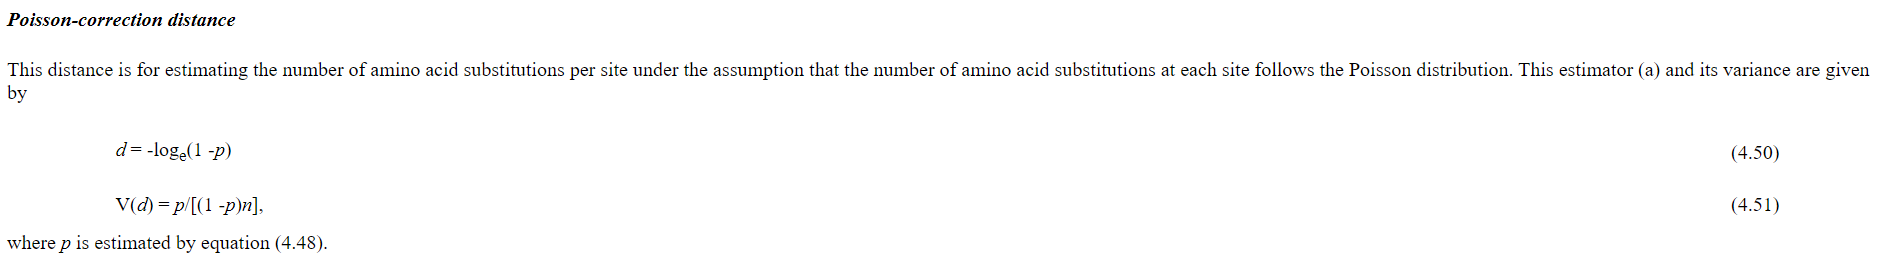

In [ ]:
def compute_poisson_distance(seq1, seq2):
    p_dist = compute_p_distance(seq1, seq2)
    if p_dist >= 1.0:
        return float('inf')  # Avoid log(0) or negative values
    return -math.log(1 - p_dist)


TODO: why you need poisson

In [ ]:
species_names = list(sequences_dict.keys())
num_species = len(species_names)

print("\nPoisson corrected distance to Human:")
print("-" * 30)
print(f"{'Species':<30} | {'poisson-distance':>10}")
print("-" * 30)

for species in species_names:
    if species == "Homo sapiens (Human)":
        continue
    aligned_human = alignments_dict[species][0]
    aligned_other = alignments_dict[species][1]

    p_dist = compute_poisson_distance(aligned_human, aligned_other)
    print(f"{species:<30} | {p_dist:10.4f}")



to do a dendogram, you need pairwise sequence alignment of all-all, not just one species-human

In [ ]:
distances = np.zeros((num_species, num_species))  # initialize full matrix

for i in range(num_species):
    for j in range(i):  # only compute for lower triangle
        species1 = species_names[i]
        species2 = species_names[j]

        record1 = sequences_dict[species1]
        record2 = sequences_dict[species2]

        alignment = aligner.align(record1.seq, record2.seq)[0]
        corrected_distance = compute_poisson_distance(alignment[0], alignment[1])

        distances[i][j] = corrected_distance
        distances[j][i] = corrected_distance  # mirror

A->B, B->A

In [ ]:
distances

TO DO: NOT SURE IF THIS IS CORRECT
Reference https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

WIKIPEDIA REFERENCE PROVIDED BY DOC:
https://en.wikipedia.org/wiki/UPGMA

In [ ]:
condensed = squareform(distances)

In [ ]:
condensed

In [ ]:
linkage_matrix = linkage(condensed, method='average')  # UPGMA

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=species_names, leaf_rotation=90)
plt.title("Dendrogram from poisson-distance (UPGMA)")
plt.ylabel("poisson-distance")
plt.tight_layout()
plt.show()
